In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('covid_de.csv', parse_dates = ['date'])
df['gender'].fillna('Not Reported', inplace = True)
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790555 entries, 0 to 2790554
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     object        
 2   age_group  object        
 3   gender     object        
 4   date       datetime64[ns]
 5   cases      int64         
 6   deaths     int64         
 7   recovered  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 170.3+ MB


In [4]:
df.describe()

,cases,deaths,recovered
count,2.790555e+06,2.790555e+06,2.790555e+06
mean,1.333496e+01,5.761148e-02,1.305119e+01
std,3.009627e+01,3.214108e-01,3.006811e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


In [5]:
df.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

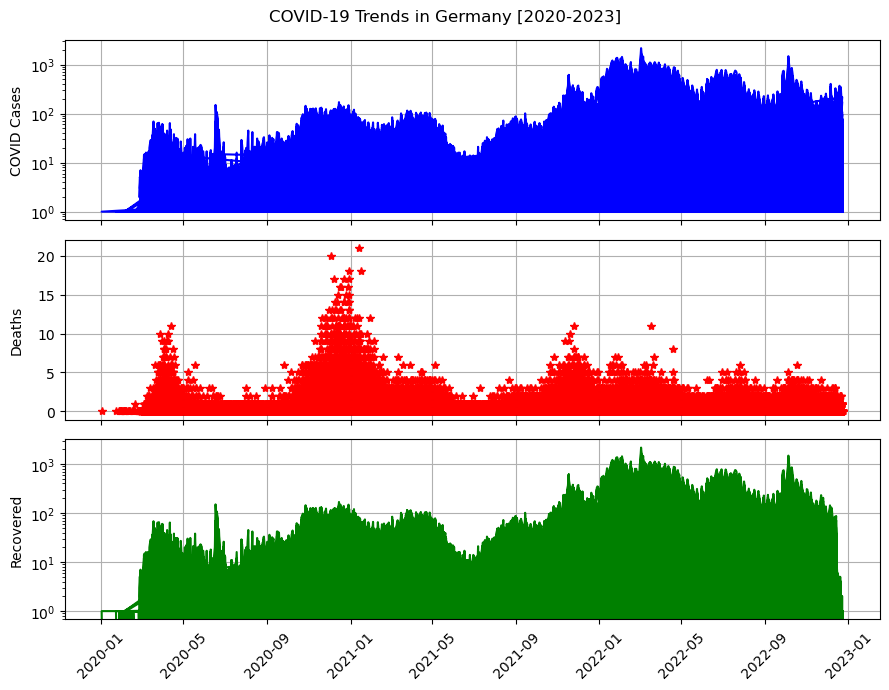

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True, figsize = (9,7))
fig.suptitle ("COVID-19 Trends in Germany [2020-2023]")

ax1.plot(df.date,df.cases, 'b-')
ax1.set_ylabel('COVID Cases')
ax1.grid()
ax1.set_yscale('log')

ax2.plot(df.date,df.deaths, 'r*')
ax2.set_ylabel('Deaths')
ax2.grid()

ax3.plot(df.date,df.recovered, 'g')
ax3.set_ylabel('Recovered')
ax3.tick_params(axis = 'x', rotation = 45)
ax3.grid()
ax3.set_yscale('log')

fig.align_labels()
fig.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Cases/Deaths/Recovery by State in Germany'}, ylabel='state'>

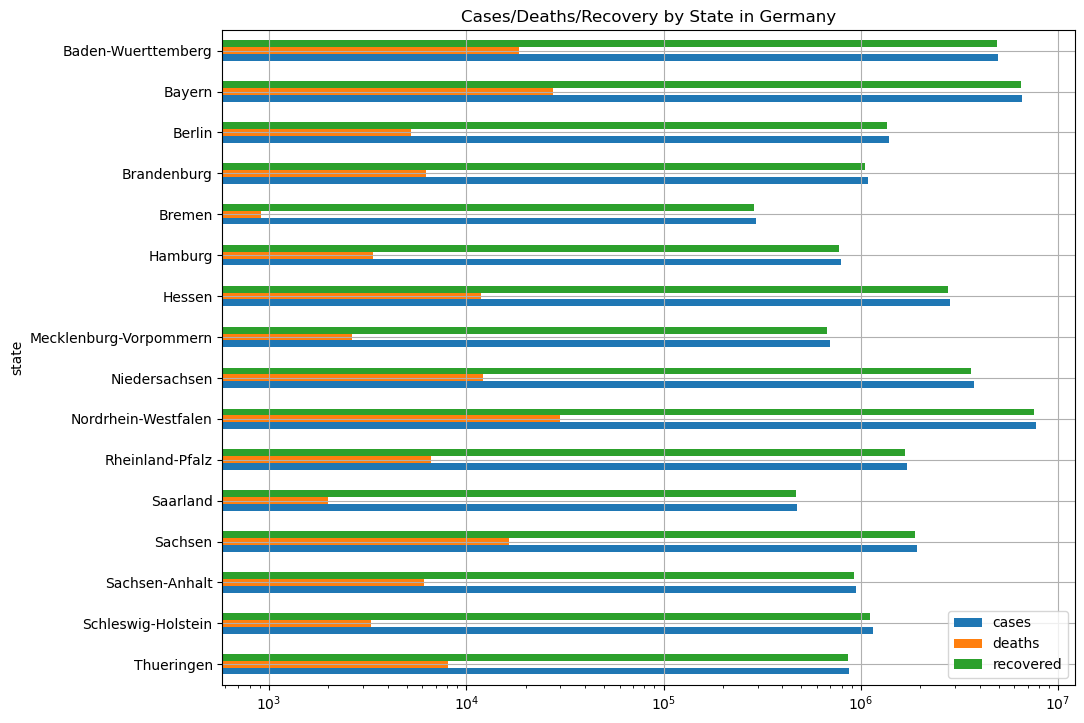

In [7]:
summary_state = df.groupby(['state']).agg('sum').round(0)
#summary_state

summary_state_df = pd.DataFrame(summary_state)
summary_state_df = summary_state_df.iloc[::-1]
summary_state_df.plot(kind = 'barh', logx = True, title = 'Cases/Deaths/Recovery by State in Germany', figsize = (11,8.5), grid = True)
# summary_state_df.plot.barh().set_xscale('log')

<AxesSubplot:title={'center':'Normalized Death/Recovery ratio'}, ylabel='state'>

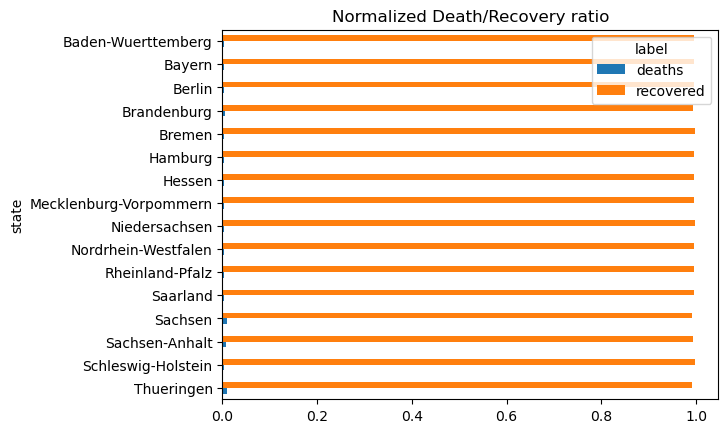

In [8]:
staked_data = df.melt(id_vars = ['state', 'county', 'age_group', 'gender', 'date'], value_vars = ['deaths','recovered'], var_name = 'label')
#pd.crosstab(staked_data.state, staked_data.label, values = staked_data.value, aggfunc = 'sum')
#pd.crosstab(staked_data.state, staked_data.label, values = staked_data.value, aggfunc = 'sum', normalize = 'index')
normalized_df = pd.DataFrame(pd.crosstab(staked_data.state, staked_data.label, values = staked_data.value, aggfunc = 'sum', normalize = 'index'))
normalized_df = normalized_df.iloc[::-1]
normalized_df.plot(kind = 'barh', title = 'Normalized Death/Recovery ratio')

In [9]:
summary_state_gender = df.groupby(['state','gender']).agg('sum').round(0)
summary_state_gender.unstack(-1)
#summary_state_gender

cases                       deaths         \
gender                        F        M Not Reported      F      M   
state                                                                 
Baden-Wuerttemberg      2549671  2381559        24732   8499   9987   
Bayern                  3386173  3164820        46093  12980  14397   
Berlin                   715453   633538        47004   2414   2814   
Brandenburg              574605   501603        12492   2940   3342   
Bremen                   153194   141777          229    424    489   
Hamburg                  412114   375197         5502   1495   1857   
Hessen                  1454096  1348027        36003   5489   6330   
Mecklenburg-Vorpommern   370287   323338         1538   1197   1442   
Niedersachsen           1905635  1781305        39339   5714   6491   
Nordrhein-Westfalen     4003967  3674509        63149  13618  16076   
Rheinland-Pfalz          880281   813195        21530   3200   3406   
Saarland                 249328   226292         1741    955   1044   
Sachsen                 1025998   901855           77   7643   8875   
Sachsen-Anhalt           498266   439890         4940   2867   3233   
Schleswig-Holstein       590210   547132        12736   1541   1738   
Thueringen               463246   405246         3039   3740   4302   

                                    recovered                        
gender                 Not Reported         F        M Not Reported  
state                                                                
Baden-Wuerttemberg                8   2508944  2345655        24462  
Bayern                           75   3347794  3129488        45742  
Berlin                            8    694896   616381        46391  
Brandenburg                       2    555268   485123        12373  
Bremen                            0    149550   138695          218  
Hamburg                           0    402530   366923         5152  
Hessen                           38   1423205  1321493        35224  
Mecklenburg-Vorpommern            0    360314   314539         1506  
Niedersachsen                    25   1846196  1729200        38539  
Nordrhein-Westfalen              36   3904057  3586745        61729  
Rheinland-Pfalz                  20    861593   797161        21305  
Saarland                          3    244795   222348         1716  
Sachsen                           0   1001787   879429           46  
Sachsen-Anhalt                    7    485483   428748         4851  
Schleswig-Holstein                3    571994   531531        12388  
Thueringen                        4    455640   397898         3023

In [14]:
summary_state_gender_age = pd.DataFrame(df.groupby(['state','gender','age_group']).agg('sum').round(0))
summary_state_gender_age#.unstack(-1)
#print(summary_state_gender_age.head())
#summary_state_gender_age.index
#summary_state_gender_age.columns

state_population = pd.read_csv("demographics_de.csv")
Dict = {'female':'F', 'male':'M'}
state_population.replace({'gender':Dict}, inplace = True)
state_population.set_index(['state','gender','age_group'], inplace = True)
#print(state_population.head())

summary_state_gender_age_population = summary_state_gender_age.join(state_population, how = 'left')

#create function for percentage calculation and representation

def PercentagePerPolpulation(part_of_population, population):
    #return part_of_population/population.astype(float).map("{:.2%}".format)
    return part_of_population/population

summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['cases'],x['population']), axis = 1)
summary_state_gender_age_population['deaths per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['deaths'],x['population']), axis = 1)
summary_state_gender_age_population['recoveries per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePerPolpulation(x['recovered'],x['population']), axis = 1)


# def PercentagePresentation(percentage):
#     return str(percentage).map("{:.2%}".format)

# summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population.apply(lambda x: PercentagePresentation(x['cases per population']), axis = 1 )

summary_state_gender_age_population['cases per population'] = summary_state_gender_age_population['cases per population'].astype(float).map("{:.2%}".format)
summary_state_gender_age_population['deaths per population'] = summary_state_gender_age_population['deaths per population'].astype(float).map("{:.2%}".format)
summary_state_gender_age_population['recoveries per population'] = summary_state_gender_age_population['recoveries per population'].astype(float).map("{:.2%}".format)

#pd.set_option('display.max_rows',300)

summary_state_gender_age_population.to_csv('SummaryByStateGenderAge.csv')
summary_state_gender_age_population



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


cases  deaths  recovered  \
state              gender       age_group                               
Baden-Wuerttemberg F            00-04        66249       4      66032   
                                05-14       293446       4     292887   
                                15-34       764362      21     756813   
                                35-59      1003754     298     989018   
                                60-79       319322    1892     311156   
...                                            ...     ...        ...   
Thueringen         Not Reported 05-14          781       0        780   
                                15-34          824       0        822   
                                35-59          832       1        827   
                                60-79          263       1        261   
                                80-99          117       2        114   

                                           population cases per population  \
state              gender       age_group                                    
Baden-Wuerttemberg F            00-04        261674.0               25.32%   
                                05-14        490822.0               59.79%   
                                15-34       1293488.0               59.09%   
                                35-59       1919649.0               52.29%   
                                60-79       1182736.0               27.00%   
...                                               ...                  ...   
Thueringen         Not Reported 05-14             NaN                 nan%   
                                15-34             NaN                 nan%   
                                35-59             NaN                 nan%   
                                60-79             NaN                 nan%   
                                80-99             NaN                 nan%   

                                          deaths per population  \
state              gender       age_group                         
Baden-Wuerttemberg F            00-04                     0.00%   
                                05-14                     0.00%   
                                15-34                     0.00%   
                                35-59                     0.02%   
                                60-79                     0.16%   
...                                                         ...   
Thueringen         Not Reported 05-14                      nan%   
                                15-34                      nan%   
                                35-59                      nan%   
                                60-79                      nan%   
                                80-99                      nan%   

                                          recoveries per population  
state              gender       age_group                            
Baden-Wuerttemberg F            00-04                        25.23%  
                                05-14                        59.67%  
                                15-34                        58.51%  
                                35-59                        51.52%  
                                60-79                        26.31%  
...                                                             ...  
Thueringen         Not Reported 05-14                          nan%  
                                15-34                          nan%  
                                35-59                          nan%  
                                60-79                          nan%  
                                80-99                          nan%  

[286 rows x 7 columns]